# **Память в Python.**

Сегодня мы в ознакомительных целях обсудим основы того как в **`Python`** устроены переменные и как работает память.


> **Темы разговора:**
> - Как в питоне выделяется память?
> - Ссылочный тип данных - что это?
> - Какие есть особенности в работе с переменными?


В этом ноутбуке я попытался собрать основные понятия и матералы, которые мне удалось найти.

Перейдем к изучению!


По вопросам:
*Гордей Андреевич Зуев - @WhiteShape*

## **Как в питоне выделяется память?**

Когда мы начинаем говорим о памяти в компьютере для программирования, мы сталкиваемся с большим количеством особенностей! Понять их поначалу не так легко, но попробуем это сделать, рассмотрев более бытовой пример.

> К примеру (не будем уходить далеко), представим, что мы хотим скачать фильм на флешку и передать ее товарищу. Фильм весит около 6 ГБ, но вот так беда, размер нашей флешки всего лишь 4 ГБ.
>
> Что делать? Пока что не очень понятно. Мы изначально выделили 4 ГБ на наш фильм и прочие файлы, купив флешку определенного размера, поэтому в данном случае остается единственное решение - купить другую флешку большего размера, к примеру, размером 8 ГБ.
>
> Получается, купив новую флешку, мы выделили на все наши дела 8 ГБ и можем ими пользоваться как хотим.

**По сути, эту особенность можно назвать как "Ручное управление памятью" - мы сами выделили определенный объем памяти и используем его для наших нужд.** В программировании все работает похожим образом - под определенные нужды компьютера (или же программы) выделяется память. А после эта память используется для хранения файлов и для работы с этими файлами - именно в таком случае все будет работать корректно.

---

*Пока что все очень гладко, но какие могут быть проблемы?*

In [ ]:
# Ситуация.

M = [0] * 2 # Создаем список размером 2.

M[0] = 10 # Добавляем Элемент 1
M[1] = 20 # Добавляем Элемент 2
M[2] = 30 # Добавляем Элемент 3

# Мы хотим поместить больше, чем у нас есть места в выделенном списке.
# --> IndexError
# --> list assignment index out of range

### **Предаставим ситуацию!**

Мы создали текстовый файл внутри нашей программы и записали в него наш конспект, на это было выделен 1КБ. Спустя время мы продолжили писать и вышли за пределы 1КБ. Что с этим делать? Ничего не сохранится?

А вот сохранится, но только при условии, что мы зашли в настройки и выделили на файл больше памяти. В таком случае все сработает корретко.

### **А к чему это вообще?**

В программировании нужно делать похожим образом! Но вот как зайти в эти настройки? Как выделить память? В С++ и прочих языках это прописывается самостоятельно (кодом), там все такое же ручное управление памятью, но есть такие языки программирования, в которых эти настройки скрыты, в них все реализуется автоматически!

Когда управлению памятью полностью автоматическое (то есть когда распределение памяти выполняется во время выполнения программы), ее можно назвать "**Динамической**"!

**Python как раз использует динамическую память!**

Когда мы создаем переменную / список / строку и прочее, программа автоматически выделяет нужный минимум памяти, чтобы все корректно работало, но практически всегда в эту память входит и запасная часть!

Если же у нас есть изменяемый типа данных - программа перераспределяет память и выделяет нам больше нужного (В других языках это выделение нужно было делать бы вручную).

In [ ]:
# Ситуация исправленная

M = [0] * 2 # Создаем список размером 2.

M[0] = 10 # Добавляем Элемент 1
M[1] = 20 # Добавляем Элемент 2

M.append(0) # Добавили в конец элемент, увеличив количество мест до 3.

M[2] = 30 # Добавляем Элемент 3

# Теперь получается разместить третий элемент.

## **Обсуждаем одно из решений.**

Увидев ситуацию понимаем, что мы выделяем небольшое количество памяти для какой-либо структуры и, если что, можем перераспределить память. **Почему бы нам тогда сразу не выделять много памяти на все?**

> А потому, что таким образом мы просто будем терять очень много памяти. Представим, что у нас на список выделяется аж целых 10 МБ, а в самом списке хранится одно число. По сути, мы можем ух как много чисел добавить в этот список, но существует очень мало сценариев, когда для этого используют список, а не отдельный файл. **И если таких переменных много, то наша программа съедает ужасно много памяти, тем более, если мы не чистим ее!**

*Но, кстати, что означает чистить память? Вернемся к этому моменту капельку позже, а сейчас посмотрим как вообще устроено хранение информации в `Python`.*

In [ ]:
M = [0] * 1000
M[0] = 2024

# M = [2024, 0, 0, 0 ....]

### **Как сохраняется информация в `Python`?**

**Информация в питоне хранится при помощью ссылок. Когда мы создаем объект, мы создаем пару: `переменная - ячейка памяти`. И связаны они друг с другом ссылкой.**

Ниже будет код, где мы создадим переменную, выведем тип данных, и ячейку, с которой переменная связана. Также ниже будет визуализация.


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - ['Gordey']
Тип - <class 'list'>
id - 139780607055936
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - [1]
Тип - <class 'list'>
id - 139781775405760
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


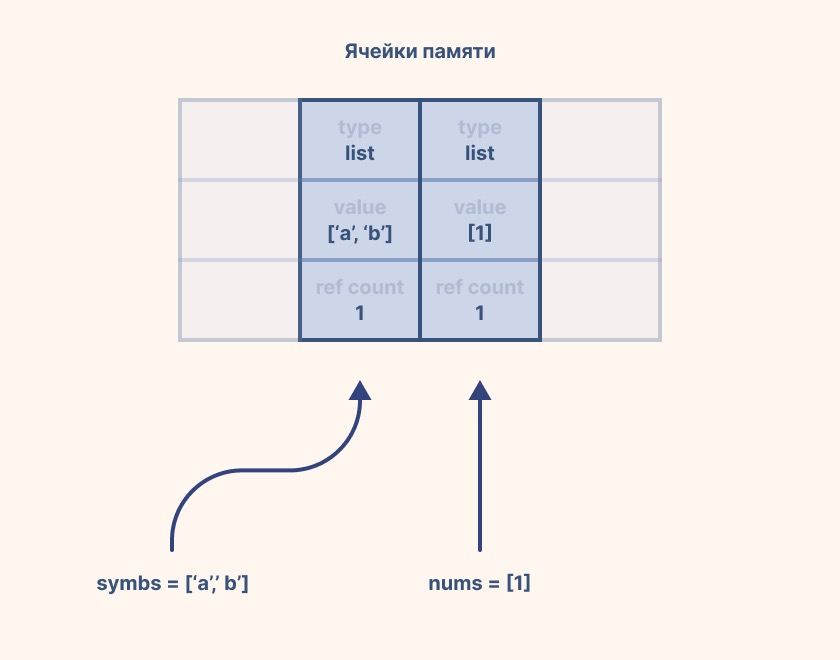

In [ ]:
names = ['Gordey'] # Обозначим переменную.
nums = [1] # Обозначим переменную.

print('- - ' * 25)

print(f'Значение - {names}')
print(f'Тип - {type(names)}')
print(f'id - {id(names)}')

print('- - ' * 25)

print(f'Значение - {nums}')
print(f'Тип - {type(nums)}')
print(f'id - {id(nums)}')

print('- - ' * 25)

# Выводим картинку
from PIL import Image
img = Image.open('/content/tg_image_3139776220.jpeg')
display(img)

### **Что мы видим?**

А мы видим, что мы создали переменную и программа ее связала с определенной ячейкой в памяти (Видим выше, что номера ячеек (id) отличаются!)

**Но что такое `ref count` на картинке выше?** А это количество ссылок, которые указывают на объект! И действительно, видим внизу, что на каждую ячейку указывает по одной ссылке!

Давайте попробуем поэксперементировать и указать на один объект другими переменными.

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - ['Gordey']
Тип - <class 'list'>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - [1]
Тип - <class 'list'>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


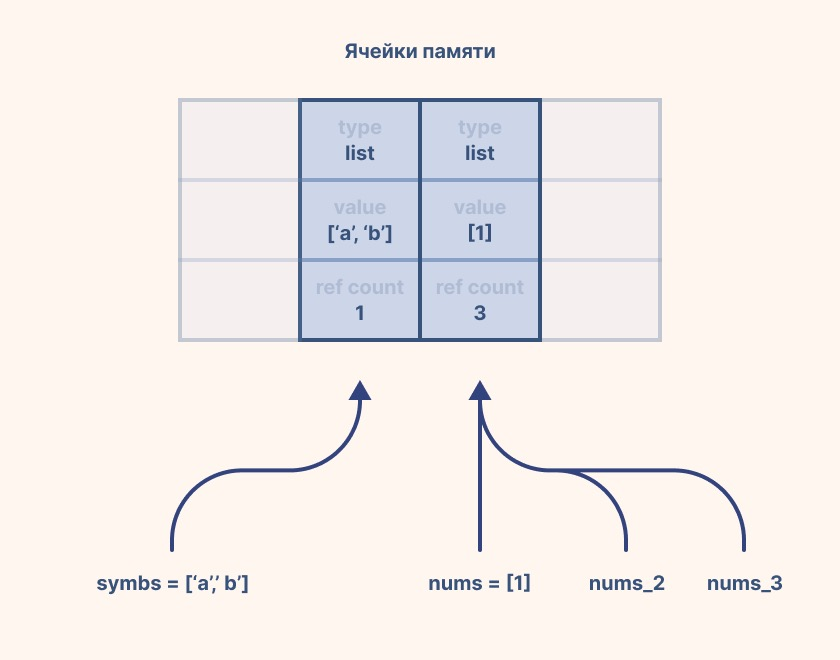

In [ ]:
names = ['Gordey'] # Обозначим переменную.

nums = [1] # Обозначим переменную.
nums_2 = nums # Сослались на nums.
nums_3 = nums_2 # Сослались на nums_2 и, как следствие, на nums.

print('- - ' * 25)

print(f'Значение - {names}')
print(f'Тип - {type(names)}')

print('- - ' * 25)

print(f'Значение - {nums}')
print(f'Тип - {type(nums)}')

print('- - ' * 25)

# Выводим картинку
img = Image.open('/content/tg_image_3532216741.jpeg')
display(img)

**А что видим здесь?**

Количество ссылок на объект увеличилось. И мы можем видеить это на картинке в разделе `ref count`. Но как это проверить кодом?

In [ ]:
import sys # Испортируем библиотеку.

print(sys.getrefcount(names)) # Выводим количество ссылок, указывающих на names
print(sys.getrefcount(nums)) # Выводим количество ссылок, указывающих на nums

2
4


**Видим 2 и 4 вместо нужных 1 и 3. Почему так?**

А все просто, когда мы обращамся к объекту и смотрим количество ссыланий на него, то мы там создаем временную ссылку, откуда и появляется `+ 1`.

Поэтому, по сути, можно сделать так:

In [ ]:
import sys # Испортируем библиотеку.

print(sys.getrefcount(names) - 1) # Выводим количество ссылок, указывающих на names
print(sys.getrefcount(nums) - 1) # Выводим количество ссылок, указывающих на nums

1
3


### **Но как все-таки сослаться на объект и сделать его копию?**

А все легко! Просто нужно воспользоваться функцией `.copy()`

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - ['Gordey']
Тип - <class 'list'>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Значение - [1]
Тип - <class 'list'>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


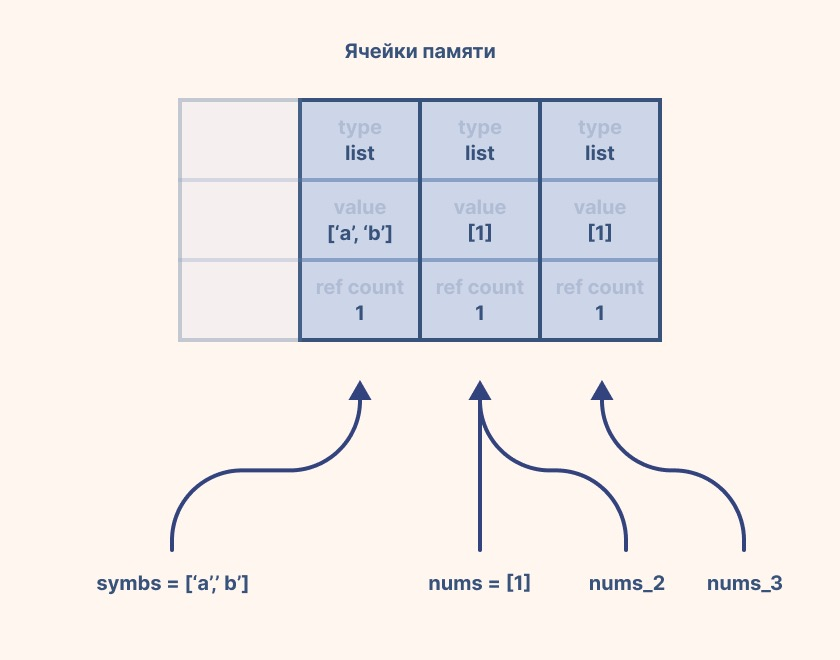

In [ ]:
names = ['Gordey'] # Обозначим переменную.

nums = [1] # Обозначим переменную.
nums_2 = nums # Сослались на nums.
nums_3 = nums.copy() # СОСЛАЛИСЬ НА КОПИЮ -> Сделали копию и сослались на нее (На новый объект)

# nums_3 = nums[:] - аналог nums_3 = nums.copy()

print('- - ' * 25)

print(f'Значение - {names}')
print(f'Тип - {type(names)}')

print('- - ' * 25)

print(f'Значение - {nums}')
print(f'Тип - {type(nums)}')

print('- - ' * 25)

# Выводим картинку
img = Image.open('/content/tg_image_3749983217.jpeg')
display(img)

Получается, теперь мы решили проблему, расписанную ниже.

**Мы теперь не меняем изначальный список.**

In [ ]:
M = [1,2] # Создали M.
N = M # Сослались на M.

N.append(3) # Добавили 3 в список N (Но по факту, в список M).
print(M)

[1, 2, 3]


**А меняем созданную копию, не задевая старые данные!**

In [ ]:
M = [1,2] # Создали M.
N = M.copy() # Сослались на M.

N.append(3) # Добавили 3 в список N (Но по факту, в список M).
print(M)

[1, 2]


### **Вроде как все обсудили, но что случается с теми объектами, на которые не ссылается ни одна переменная?**

А чтобы ответить на этот вопрос, мы обратимся к одному понятию!

> **Сборщик мусора** - это форма автоматического управления памятью. Сборщик мусора пытается восстановить память, освобождая ячейки, которые перестали исполоьзоваться.

**В `Python` же сборщик мусора обращает внимание на то, сколько переменных ссылается на объект. Если их 0 - объект удаляется из памяти.**

Ведь не нужно хранить информацию, к которой уже никто и никогда не сможет обратится.

*Удалить связь переменной и объекта можно с помощью знакомой нам `del` (от `delete`).*

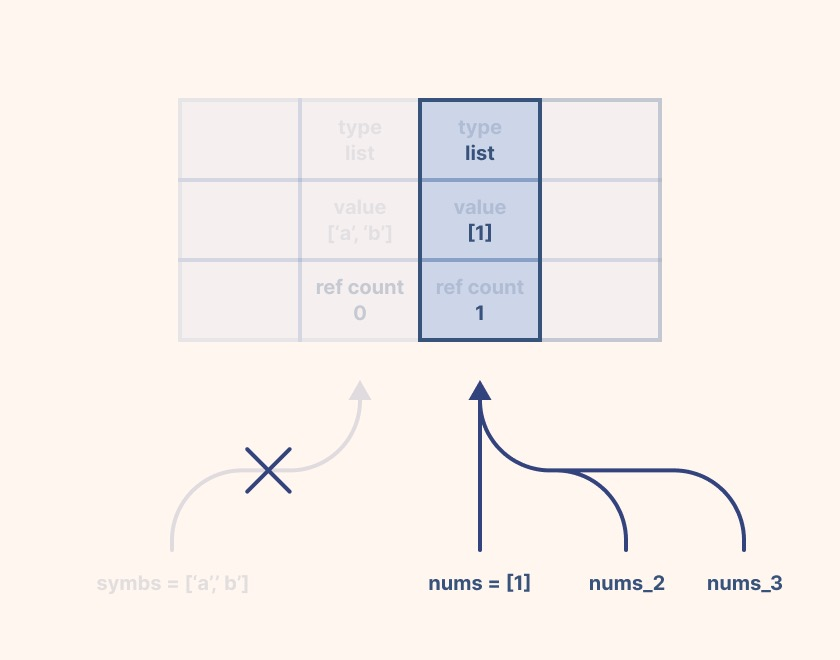

In [ ]:
names = ['Gordey'] # Обозначим переменную.
del names # Удаляет связь names и объекта

# Выводим картинку
img = Image.open('/content/tg_image_3457091151.jpeg')
display(img)

## **Важное и интересное.**


**Именно по всем причинам, что были вещи существуют такие функции, как .`clear()`, вместо которого часто используют `= []`**

Эта функция позволяет отчистить список, множество или словарь, не заменяя при этом объект (и ссылку на него).

**Для железа операция выделения новой ячейки и перезаписи очень значительно и трудозатратна.**

In [ ]:
M = [1, 2, 3]
print(id(M))

M = []
print(id(M))

# Ячейки изменились.

139781065688704
139780606203392


In [ ]:
M = [1, 2, 3]
print(id(M))

M.clear()
print(id(M))

# Сохранили ячейку, сохранили время.

139780607436352
139780607436352


**Точно также работает и по тем же причинам работает функция `.append()` вместо простого сложения списков `(+ [...])`.**

In [ ]:
M = [1, 2, 3]
print(id(M))

M = M + [4]
print(id(M))

# Ячейки изменились.

139780606972032
139780607696448


In [ ]:
M = [1, 2, 3]
print(id(M))

M.append(4)
print(id(M))

# Сохранили ячейку, сохранили время.

139780605747456
139780605747456


**Чтобы проверить, указывают ли переменные на один объект, можем воспользоваться инструментом `is`.**

In [ ]:
# Создаем одинаковые числа.
a = 1000
b = a

print(id(a))
print(id(b))
print(a is b)

# Видим, что у переменных одна ячейка памяти.

True


In [ ]:
# Создаем одинаковые числа.
a = 1000
b = 1000

print(id(a))
print(id(b))
print(a is b)

# Видим, что хоть у переменных одно значение. Но это не значит, что они ссылаются на один объект.
# У 'a' и 'b' разные ячейки памяти.

139780606412816
139780606426160
False


**Но. Если же мы попробуем провернуть этот фокус с числами до от -5 до 256, с нецелыми числами или со строками, то мы столкнемся с неожиданностью! id разных переменных с одинаковыми значениями будут также одинаковыми!**

**Почему так происходит?**

А потому, что Python (точнее его CPython версия) пытается оптимизировать память и компилятор будет объединять постоянные значения некоторых известных неизменяемых типов, таких как `int`, `float`, `str`.

In [ ]:
# Создаем одинаковые строки.
c = 'Gordey'
d = 'Gordey'

print(id(c))
print(id(d))
print(c is d)

139780605786544
139780605786544
True


In [ ]:
# Создаем одинаковые числа.
e = 29
f = 29

print(id(e))
print(id(f))
print(e is f)

139781915001968
139781915001968
True


**Чтобы посмотреть сколько памяти тратится на объект, можем воспользоваться инструментов `.__sizeof__()`.**

In [ ]:
M = [] # Пустой список
print(M.__sizeof__())

M = [1, 2, 3, 4] # Заполненный список
print(M.__sizeof__())

 # Кстати, можем узнать отсюда сколько памяти выделяется на отдельный элемент (А может, и на пару элементов?...)

40
104


## **Коротко.**

### **Память и Python**
В `Python` используется динамическая память. Это означает, что управление памятью осуществляется автоматически без прямого вмешательства разработчика.

Это достигается благодаря механизму сборки мусора, который автоматически освобождает память, занятую объектами, которые больше не используются программой.

В `Python` каждый объект имеет счетчик ссылок, который увеличивается каждый раз, когда на объект создается новая ссылка, и уменьшается, когда ссылка удаляется. Когда счетчик ссылок объекта достигает нуля, объект считается мусором и подлежит удалению сборщиком мусора.


### **Плюсы для программиста.**
Сборщик мусора в `Python` работает сам, запускаясь автоматически, когда система считает это необходимым. Это позволяет разработчикам сосредоточиться на написании кода, не беспокоясь о ручном управлении памятью.


### **Зачем вообще динамическая память?**
Важно понимать, что автоматическое управление памятью значительно упрощает разработку! Но вместе с этим эот инструмент влияет и на производительность программы, особенно в случаях, когда создаются и удаляются большое количество объектов.

В таких ситуациях памятью пытаются управлять вручную, оптимизируя использование памяти, а не используя встроенные инструменты. Именно это одна из причин, почему люди иногда выбирают другие языки программирования.

## **Задачи на подумать.**

---

**Задача №1.**

Посмотреть как работает копия многомерных массивов.

---

**Задача №2.**

Почему когда мы таким образом создаем матрицу 3х3 `[[0] * 3] * 3`, а потом меняем, к примеру, элемент [0][0], то меняется весь первый столбец?

---


## **Источники:**

[Memory Management in Python (eng)](https://www.honeybadger.io/blog/memory-management-in-python/)

[Помнить всё. Как работает память в Python.](https://proglib.io/p/pomnit-vse-kak-rabotaet-pamyat-v-python-2021-03-14)

[Как работает память в Python.](https://habr.com/ru/companies/domclick/articles/530804/)

[Распределение памяти в Python: сколько и в каких случаях занимают типы данных.](https://tproger.ru/articles/raspredelenie-pamjati-v-python-skolko-i-v-kakih-sluchajah-zanimajut-tipy-dannyh)

https://pythonist.ru/keshirovanie-nebolshih-chisel-v-cpython/

https://legkovopros.ru/questions/17314/kak-pamyat-ob-ekta-python-rabotaet-na-int-menee-5-i-vy-she-256-dublikat

https://pythonpip.ru/osnovy/upravleniya-pamyatyu-v-python-osnovy-raboty-s-primerami

*Made by Gordey Zuev.*

Для обратной связи - [@WhiteShape](https://t.me/WhiteShape)